## FootballDecoded - Test Pass Network
### Prueba rápida de visualización de redes de pase

In [1]:
# Imports
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from match_data import extract_match_data, get_team_summary
from pass_network import create_pass_network, save_high_quality
plt.style.use('default')
%matplotlib inline

In [2]:
# Extraer/cargar datos (solo se extrae la primera vez)
print("🔍 Cargando datos del partido...")
match_data = extract_match_data(match_id=1821769, league="ESP-La Liga", season="2024-25")

# Resumen
summary = get_team_summary(match_data)
print("📊 RESUMEN:")
for team, stats in summary.items():
    print(f"{team}: {stats['players']} jugadores, {stats['total_passes']} pases")

🔍 Cargando datos del partido...
🎯 Procesando partido 1821769 (ESP-La Liga 2024-25)
   📂 Datos encontrados, cargando desde archivos...
📊 RESUMEN:
Athletic Club: 15 jugadores, 199 pases
Barcelona: 15 jugadores, 689 pases


ValueError: cannot convert float NaN to integer

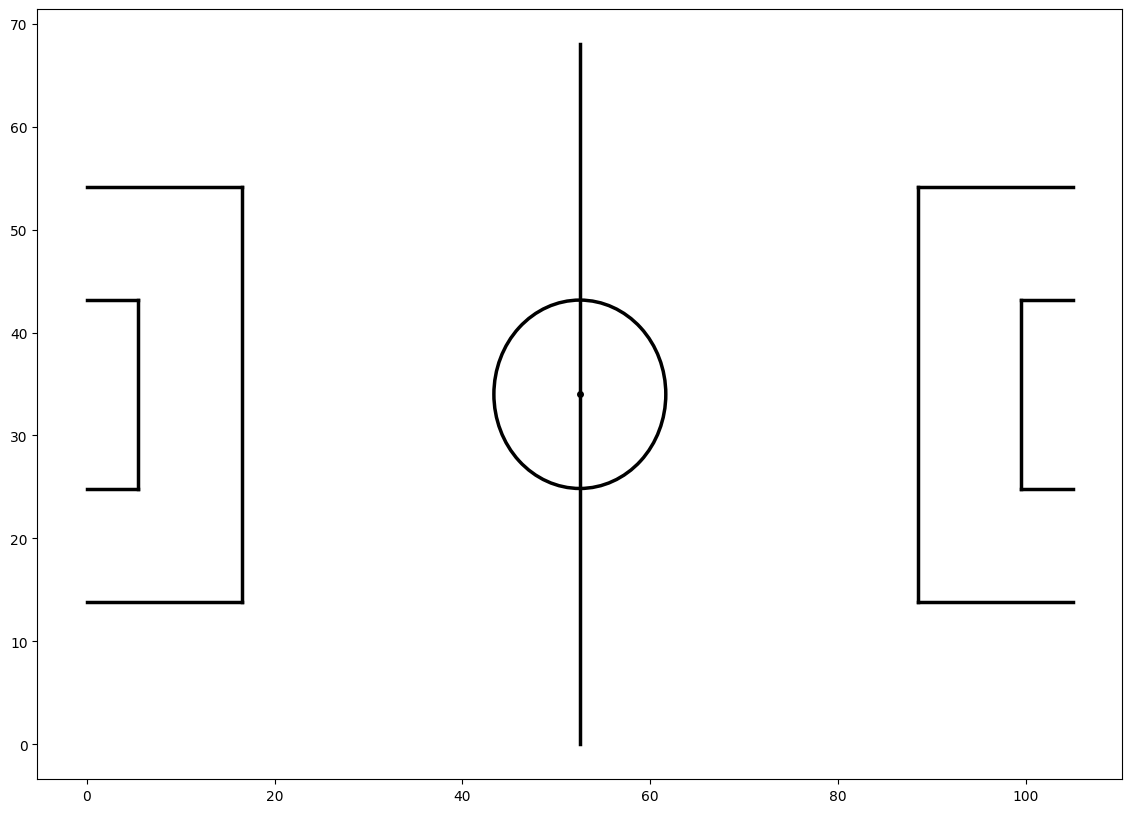

In [3]:
# Barcelona - Red de pases
fig_barca = create_pass_network(match_data=match_data, team_name="Barcelona", figsize=(14, 10))
plt.show()